In [14]:
import os
import sys
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime
import jpholiday
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

# 作業ディレクトリの設定
try:
    os.chdir('H:/マイドライブ/03_code_test/clustering-house_trial')
    data_path_header = 'G:/マイドライブ/01_研究/02_円山町/1_データ前処理'
except FileNotFoundError:
    os.chdir('G:/マイドライブ/03_code_test/clustering-house_trial')
    data_path_header = 'H:/マイドライブ/01_研究/02_円山町/1_データ前処理'
print("Current Working Directory: ", os.getcwd())

Current Working Directory:  H:\マイドライブ\03_code_test\clustering-house_trial


In [ ]:
# CSVファイルの読み込み
df_data = pd.DataFrame()
file_path_list = glob.glob(f'./data/*.csv')
for file_path in file_path_list:
    df = pd.read_csv(file_path)
    df_data = pd.concat([df_data, df], axis=0).reset_index(drop=True)

# 欠損処理
df_dropped = df_data.drop(['Rk', 'Name', 'Tm', 'Lev', 'Aff', 'GS', 'GF', 'SO/W', 'Name-additional'], axis=1)
df_features = df_dropped.dropna()
# 正規化
mm = preprocessing.MinMaxScaler()
df_features_mm = pd.DataFrame(mm.fit_transform(df_features), columns=df_features.columns)
df_features_mm

,Rk,Name,Age,Tm,Lev,Aff,W,L,W-L%,ERA,...,BK,WP,BF,WHIP,H9,HR9,BB9,SO9,SO/W,Name-additional
0,1,Kohei Arihara,31,FKA,Fgn,NaN,14,7,0.667,2.36,...,0,1,718,0.980,7.0,0.6,1.8,6.8,3.70,player.fcgi?id=arihar000koh
1,2,Hiromi Itoh,26,NPN,Fgn,NaN,14,5,0.737,2.65,...,0,1,710,1.072,7.7,0.7,2.0,8.2,4.13,player.fcgi?id=itoh--002hir
2,3,Kazuya Ojima*,27,LOT,Fgn,NaN,12,10,0.545,3.58,...,0,5,671,1.182,8.7,0.8,2.0,7.3,3.67,player.fcgi?id=ojima-000kaz
3,4,Masaru Fujii*,27,TOH,Fgn,NaN,11,5,0.688,2.93,...,0,3,529,1.325,9.9,0.6,2.1,5.3,2.55,player.fcgi?id=fujii-003mas
4,5,Takahisa Hayakawa*,25,TOH,Fgn,NaN,11,6,0.647,2.54,...,0,4,690,1.121,8.2,0.5,1.8,8.5,4.57,player.fcgi?id=hayaka000tak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,96,Hidetaka Okadome,24,HAN,Fgn,NaN,1,0,1.000,2.84,...,0,0,163,1.237,8.5,0.2,2.6,5.7,2.18,player.fcgi?id=okadom000hid
196,97,Taisei Ota,25,YOM,Fgn,NaN,1,2,0.333,0.88,...,0,1,161,0.878,6.1,0.0,1.8,11.9,6.75,player.fcgi?id=ota---002tai
197,98,Masaki Oyokawa*,23,HAN,Fgn,NaN,1,3,0.250,2.76,...,0,2,121,1.193,7.7,0.6,3.1,7.1,2.30,player.fcgi?id=oyokaw000mas
198,99,Elvin Rodríguez,26,YKU,Fgn,NaN,1,1,0.500,1.80,...,1,2,183,1.156,8.0,0.2,2.4,8.8,3.67,player.fcgi?id=rodrig004elv


Cluster 0: n = 11
Cluster 1: n = 26
Cluster 2: n = 30
Cluster 3: n = 26
Cluster 4: n = 25
Cluster 5: n = 43
Cluster 6: n = 23
Cluster 7: n = 16


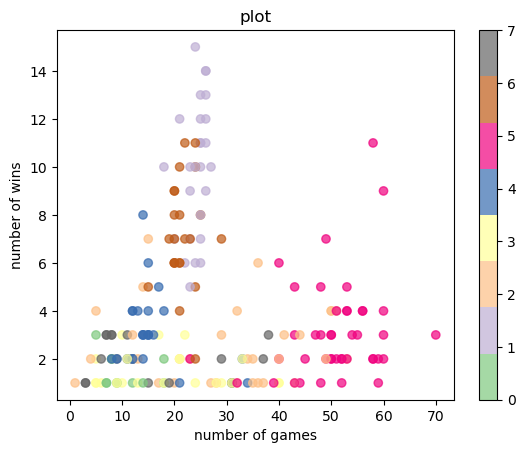

In [ ]:
from sklearn.cluster import KMeans

k = 8 # クラスター数を指示

kmeanModel = KMeans(n_clusters=k, random_state=42)
kmeanModel.fit(df_features_mm)
clusters = kmeanModel.labels_

# クラスターごとに何サンプルあるか
for i in range(k):
    num = list(clusters).count(i)
    print(f'Cluster {i}: n = {num}')

plt.scatter(df_features['G'], df_features['W'],
            c=clusters, cmap='Accent', alpha=0.7)
plt.title('plot')
plt.xlabel('number of games')
plt.ylabel('number of wins')
plt.colorbar()
plt.show()
